<a href="https://colab.research.google.com/github/taesaksit/Plant-Disease-Classification/blob/main/detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import os
from natsort import natsorted
import numpy as np
import tensorflow as tf


def prepare_image(image_path):
    image = load_img(image_path, target_size=(128, 128))
    image_array = img_to_array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # add dimension
    return image_array

def predict(image_path, model, class_names):
    image = prepare_image(image_path)
    y_pred = model.predict(image)
    predicted = class_names[np.argmax(y_pred)]
    print(f'Predicted : {predicted} ')
    print(f'Probability : {y_pred.max()} ')
    image_detected = detection(image_path)

    return  predicted , image_detected

def detection(image_path):

    # Read image
    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    # Convert to RGB and HSV
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Color detection
    lower = np.array([30, 30, 30])
    upper = np.array([90, 255, 255])
    mask = cv2.inRange(image_hsv, lower, upper)

    kernel = np.ones((3, 3), np.uint8)
    median = cv2.medianBlur(mask, 5)
    dilated = cv2.dilate(median, kernel)
    closed = cv2.erode(dilated, kernel)

    # Find contours
    contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    image_copy = image_rgb.copy()
    areas = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if 10 < area < 10000:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(image_copy, (x, y), (x + w + 2, y + h + 2), (255, 0, 0), 1)
            areas.append((w, h))

    return image_copy

def read_file():
  path_array = []
  folder = '/content/drive/MyDrive/new_grape'

  for path in os.listdir(folder):
    for file in natsorted(os.listdir(os.path.join(folder,path)))[:3]:
      path_array.append(os.path.join(folder,path,file))

  return path_array

def display_images_in_subplots(images, titles=None, cols=3):

    num_images = len(images)
    rows = (num_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(9, 3*rows))
    axes = axes.flatten()

    for i in range(num_images):
        axes[i].imshow(images[i])
        if titles:
            axes[i].set_title(titles[i])

    plt.tight_layout()
    plt.show()


# Load model
path_model = '/content/drive/MyDrive/Project/data/model_disease.h5'
model = load_model(path_model)
class_names = ['Grape_Black_rot',
               'Grape_Esca_(Black_Measles)',
               'Grape_Leaf_blight_(Isariopsis_Leaf_Spot)',
               'Grape_healthy']

#  Read image
path_image = read_file()


# Predcition
image = []
for i in path_image:
  predcited , images = predict(i , model , class_names)
  image.append(images)





1/1 [==============================] - 1s 700ms/step
Predicted : Grape_Black_rot 
Probability : 0.9333568215370178 
1/1 [==============================] - 0s 21ms/step
Predicted : Grape_Black_rot 
Probability : 0.9292592406272888 
1/1 [==============================] - 0s 20ms/step
Predicted : Grape_Black_rot 
Probability : 0.9110980033874512 
1/1 [==============================] - 0s 20ms/step
Predicted : Grape_Esca_(Black_Measles) 
Probability : 0.9959450364112854 
1/1 [==============================] - 0s 20ms/step
Predicted : Grape_Esca_(Black_Measles) 
Probability : 0.9472775459289551 
1/1 [==============================] - 0s 21ms/step
Predicted : Grape_Esca_(Black_Measles) 
Probability : 0.8405831456184387 
1/1 [==============================] - 0s 20ms/step
Predicted : Grape_healthy 
Probability : 0.9975597858428955 
1/1 [==============================] - 0s 22ms/step
Predicted : Grape_healthy 
Probability : 0.973060667514801 
1/1 [==============================] - 0s 21ms/step

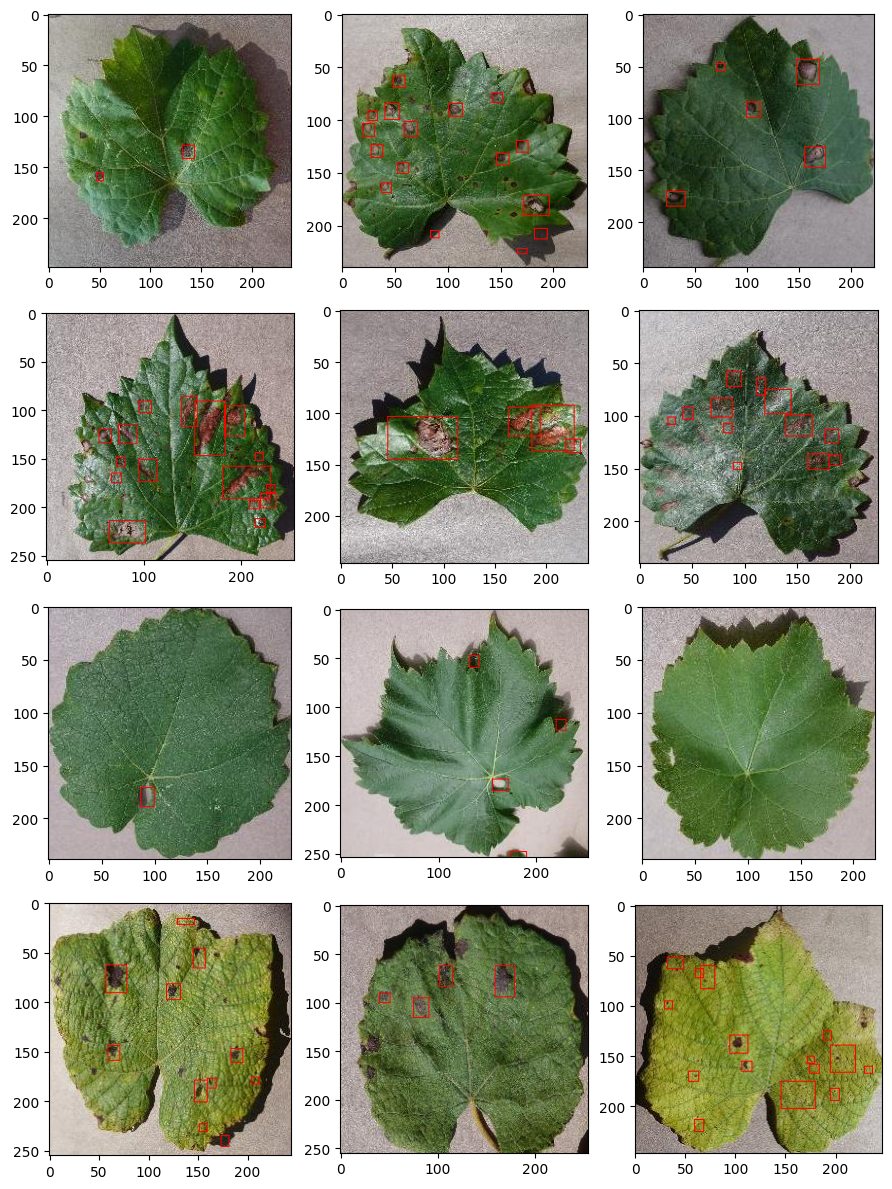

In [79]:
display_images_in_subplots(image)